In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine

In [13]:
wine = pd.DataFrame(load_wine()["data"], columns=load_wine()["feature_names"])

In [14]:
wine["target"] = load_wine()["target"]

#### unique targets

In [15]:
wine["target"].unique()

array([0, 1, 2])

#### Data correlation

In [16]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


#### Correlation to Target

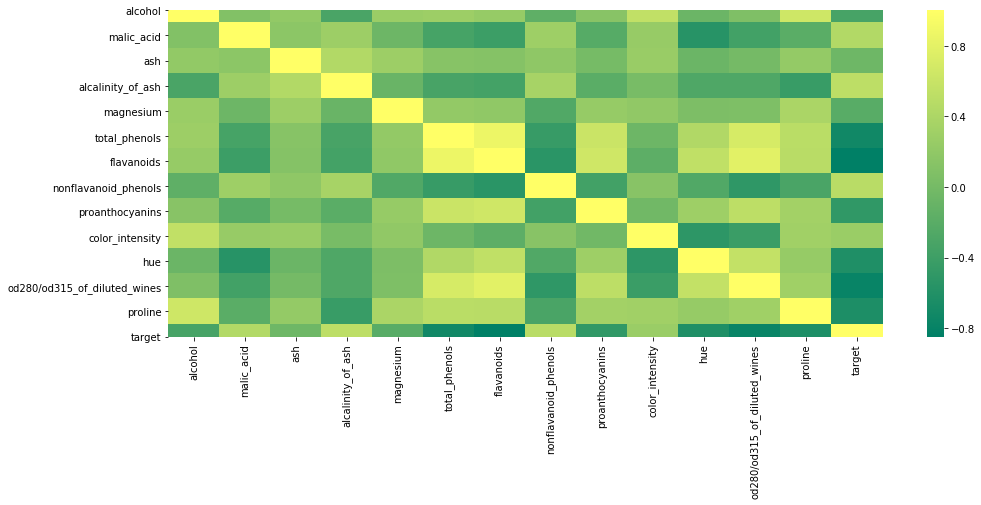

In [20]:
plt.figure(figsize = (16,6))
sns.heatmap(wine.corr(), cmap="summer")

#### Lets see whats correlatied to the Alcohol content 
- proline

In [22]:
wine.corr()["alcohol"].sort_values(ascending = False)

alcohol                         1.000000
proline                         0.643720
color_intensity                 0.546364
total_phenols                   0.289101
magnesium                       0.270798
flavanoids                      0.236815
ash                             0.211545
proanthocyanins                 0.136698
malic_acid                      0.094397
od280/od315_of_diluted_wines    0.072343
hue                            -0.071747
nonflavanoid_phenols           -0.155929
alcalinity_of_ash              -0.310235
target                         -0.328222
Name: alcohol, dtype: float64

#### Observation of the distribution of wine types in the our data set
- more type 1 than 0 and 2 and more 0 than 2

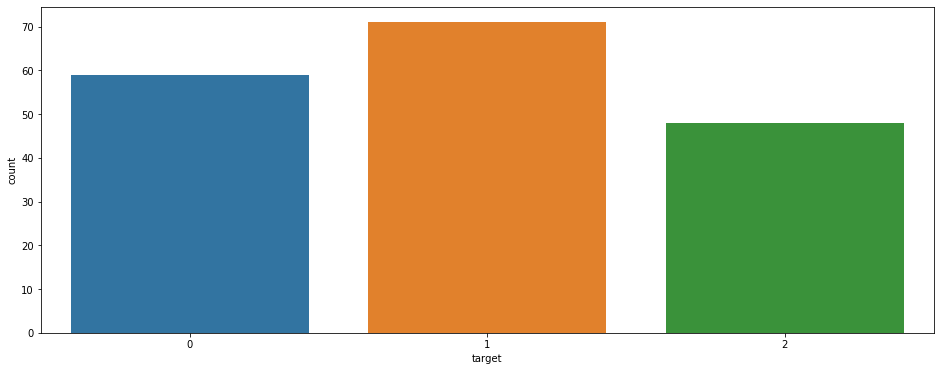

In [27]:
plt.figure(figsize = (16,6))
sns.countplot(x = "target", data=wine);

### alcohol quantity in each type of wine
- type 0 has more of a alcohol content, followed by 2. So our data has more wine with a lower alcohol content based on the plot above

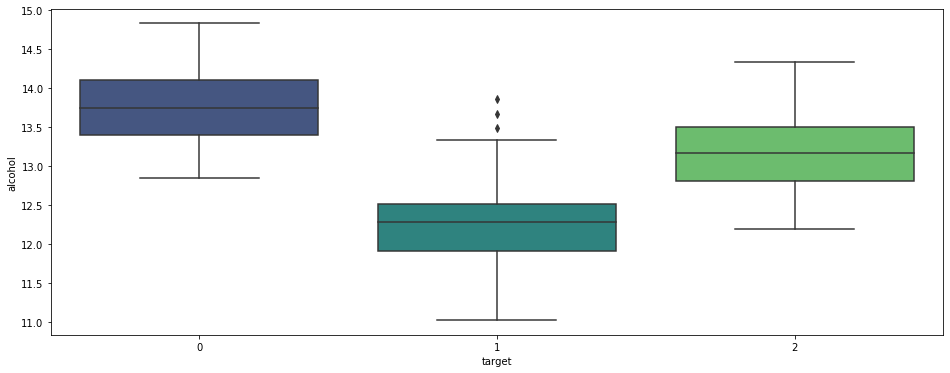

In [30]:
plt.figure(figsize = (16,6))
sns.boxplot(x = "target", y="alcohol", data=wine, palette="viridis")

### A look at the color intensity to  proline
- appears as the alcohol content increases the porline does as well
- This agrees with the correlaiton plot above as well as the alsohol content in each wine type

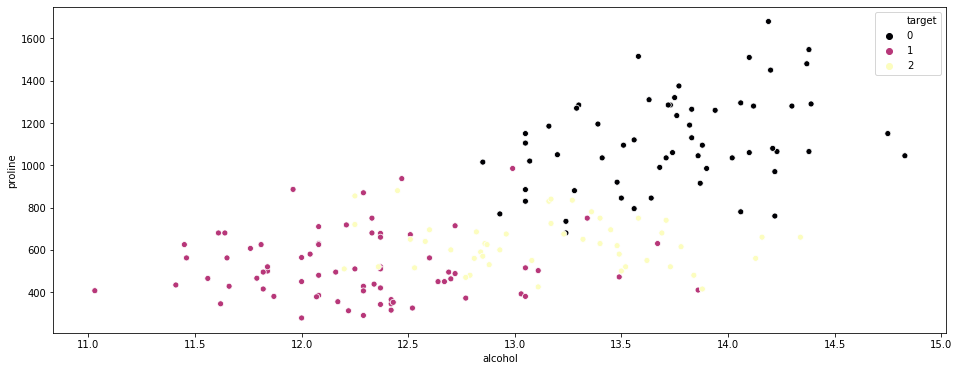

In [36]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = "alcohol", y = "proline", data=wine, hue="target", palette="magma");

### Training our data

In [37]:
X = wine.drop('target', axis=1).values
y = wine["target"].values

## Train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scale the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scalar = MinMaxScaler()

In [42]:
X_train = scalar.fit_transform(X_train)

In [43]:
X_test = scalar.transform(X_test)

### Creating our model

In [45]:
X_train.shape

(124, 13)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [74]:
logdir = "resources/logs/fit"

board = TensorBoard(log_dir= logdir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1,
    embeddings_metadata=None,)

In [75]:
stop = EarlyStopping(monitor="val_loss", verbose=2, mode="min", patience=25)

In [76]:
model = Sequential()
model.add(Dense(units = 13, activation = "relu"))
model.add(Dense(units = 6, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))
model.compile(optimization = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [77]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200,callbacks=[stop, board])

Train on 124 samples, validate on 54 samples
Epoch 1/200
124/124 [==============================] - 2s 18ms/sample - loss: 3.1665 - accuracy: 0.0161 - val_loss: 2.9335 - val_accuracy: 0.0000e+00
Epoch 2/200
124/124 [==============================] - 0s 1ms/sample - loss: 3.1682 - accuracy: 0.0000e+00 - val_loss: 2.9351 - val_accuracy: 0.0000e+00
Epoch 3/200
124/124 [==============================] - 0s 1ms/sample - loss: 3.1700 - accuracy: 0.0000e+00 - val_loss: 2.9367 - val_accuracy: 0.0000e+00
Epoch 4/200
124/124 [==============================] - 0s 1ms/sample - loss: 3.1719 - accuracy: 0.0000e+00 - val_loss: 2.9385 - val_accuracy: 0.0000e+00
Epoch 5/200
124/124 [==============================] - 0s 1ms/sample - loss: 3.1741 - accuracy: 0.0000e+00 - val_loss: 2.9408 - val_accuracy: 0.0000e+00
Epoch 6/200
124/124 [==============================] - 0s 1ms/sample - loss: 3.1766 - accuracy: 0.0000e+00 - val_loss: 2.9434 - val_accuracy: 0.0000e+00
Epoch 7/200
124/124 [===================

In [78]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.166456,0.016129,2.933489,0.0
1,3.168169,0.000000,2.935061,0.0
2,3.170004,0.000000,2.936665,0.0
3,3.171876,0.000000,2.938541,0.0
4,3.174102,0.000000,2.940757,0.0
5,3.176553,0.000000,2.943391,0.0
6,3.179618,0.000000,2.946252,0.0
7,3.182892,0.000000,2.949867,0.0
8,3.186944,0.000000,2.953915,0.0
9,3.191603,0.000000,2.958521,0.0


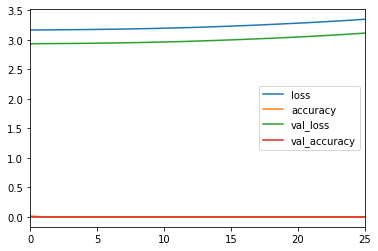

In [79]:
pd.DataFrame(model.history.history).plot()

In [80]:
predict = model.predict_classes(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.41      1.00      0.58        22
           2       0.00      0.00      0.00        13

    accuracy                           0.41        54
   macro avg       0.14      0.33      0.19        54
weighted avg       0.17      0.41      0.24        54



/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
print(confusion_matrix(y_test,predict))

[[ 0 19  0]
 [ 0 22  0]
 [ 0 13  0]]
